# Name: Pratyush Upadhyay
### Email ID: iampratyush4@gmail.com
### Github Profile: https://github.com/iampratyush4
### Linkedln Profile: https://www.linkedin.com/in/pratyushupadhyay/

### Data Science and Business Analytics Intern @ THE SPARKS FOUNDATION

#### #GRIPJUNE21

#### Task5: Exploratory Data Analysis- Sports

### Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1747]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print('Modules aare ImRported')

Modules aare ImRported


In [1748]:
# importing first dataset
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [1749]:
# importing the second dataset
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data-Preprocessing on first Dataset

In [1750]:
matches.shape

(756, 18)

In [1751]:
matches.columns

C:\Users\91775\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [1752]:
# drop the columns that are not required for this analysis
matches = matches.drop(['umpire1','umpire2','umpire3'],axis=1)

In [1753]:
matches.shape

(756, 15)

In [1754]:
# checking the information of the dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [1755]:
# checking the count of missing vallues in this dataset
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

#### 7 missing values in the City column, 4 each in 'winner' and 'player' of 'match' column

In [1756]:
# dealing with missing values
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [1757]:
matches[matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


#### These dates belongs to the matches where the city columns values are missing and we see that all these matches belong to the 2014 season. So we can use these dates and season year(2014) to find out the city of the match. On web search we can check that all the matches with missing city as played at Dubai International Stadium.

#### So we can fill this missing values with the 'Dubai' City


In [1758]:
matches.city = matches.city.fillna('Dubai')
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

#### Now we can see City column does not contain any missing values

In [1759]:
# deal with the 'winner' and 'player of the match' column
matches[matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


#### we can see that missing values of 'winner' and 'player_of_match' column corresponds to result column when there is no result 
#### of the match. So we don't need to remove this.

#### These null values are justified.

### Daata-Preprocessing on Second Dataset

In [1760]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [1761]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [1762]:
deliveries.shape

(179078, 21)

In [1763]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [1764]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### Here the last three clomns contains a lot of missing values that are justified as this dataset consists of every delivery and aplayer can't be dismissed on every ball when the player is not out on any given ball then these column must be missing and same with the dismisaal_kind column and fielder column because this fieder columnn corresponds to the player_dismiised & dismissal_ kind column and fielder column conta,ins more missing values than the other 2 columns because a fielder can't be involve in every dismissal (eg. Bowled, hit wickets etc)

In [1765]:
# analysis of ipl teams

teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

#### We can see here that a team 'Rising Pune Supergiants' repeated teice due to spelling change so first let's fix this

#### Now it's fixed and we can move fuurther

In [1766]:
matches['winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants', inplace=True)

In [1767]:
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#### Now it's fixed and we can move further now

In [1768]:
# total no of teams participated in the IPL so far
len(teams)

14

#### There are 14 teams participated in the IPL so far

In [1769]:
# teams with most number of wins
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

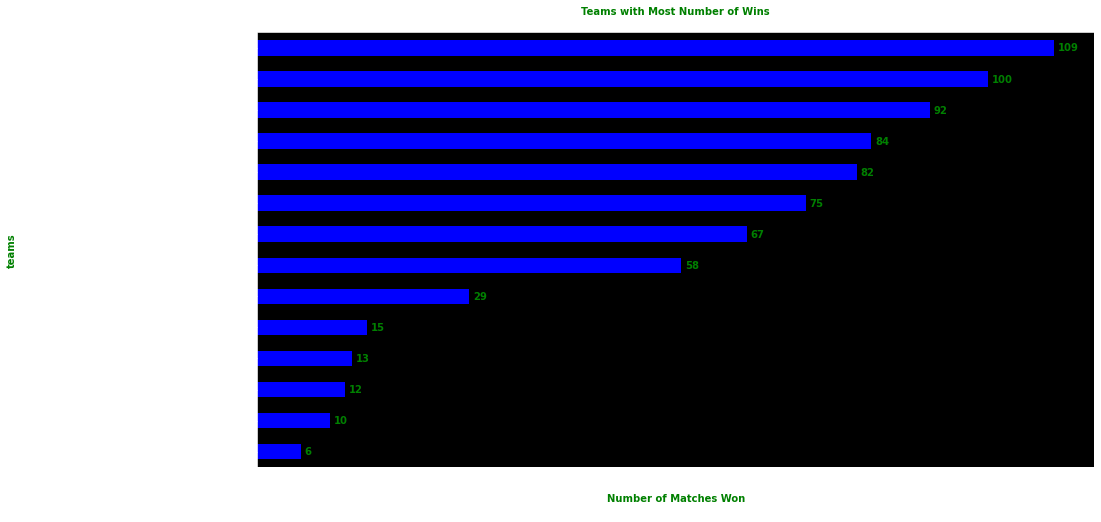

In [1770]:
teams = teams.plot.barh(figsize=(15,8), color='blue', fontsize=15)
plt.style.use('dark_background')
teams.set_title('Teams with Most Number of Wins\n',fontsize=10, fontweight='bold', color='green')
teams.set_xlabel('Number of Matches Won\n', fontsize=10, fontweight ='bold',color='green')
teams.set_ylabel('teams\n', fontsize=10, fontweight ='bold',color='green')

teams.invert_yaxis()
for i in teams.patches:
    #fixing the width of the marks labels (get width pulls the mark label left or right & get_y pushes up or down)
    teams.text(i.get_width()+.5,i.get_y()+.35, i.get_width(), fontsize=10, fontweight ='bold', color='green')

#### Mumbai Indians won maximum number of matches(109) followed by Chennai Super King(100) and Kolkata Knight Riders(92)

In [1771]:
# match info when team won by maximum runs & maximum wickets
# maximum runs
matches['win_by_runs'].max()

146

#### 146 runs is the maximum run by which a team won

In [1772]:
# match info
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Name: 43, dtype: object

#### This match was played between Mumbai Indians & Delhi Daredevils on 6th May 2017 at Venue Feroz Shah Kolta Stadium, Delhi and player of the match was LMP Simmons

In [1773]:
# maximun wickets
matches['win_by_wickets'].max()

10

#### 10 Wickets win is the maximun win by wickets

In [1774]:
# match info
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
Name: 2, dtype: object

#### This match was played between Kolkata Knight Riders & Gujarat Lions on 7th April 2017 at Saurashtra Cricet Association Stadium, Rajkot and Player of the match was CA LYNN.

In [1775]:
# check if there are more matches where team won by 10 wickets:

more_10wickets_match = matches[matches.win_by_wickets==10]

In [1776]:
more_10wickets_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium


In [1777]:
more_10wickets_match['winner'].value_counts()

Royal Challengers Bangalore    3
Deccan Chargers                1
Mumbai Indians                 1
Kolkata Knight Riders          1
Kings XI Punjab                1
Chennai Super Kings            1
Rajasthan Royals               1
Delhi Daredevils               1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

In [1778]:
more_10wickets_match['winner'].value_counts().sum()

11

####  We can see that there are total 11 matches where teams won by 10 wickets and Royal Challenges Bangalore is the only team that won by 10 wickets more than once (3 times)

In [1779]:
# team with most IPL title
# coreating a new dataframe
winners = matches[['season','winner']]

In [1780]:
# creating a empty dict for storing team name with most number of title
team_with_most_title = {}
for i in sorted(winners.season.unique()):
    team_with_most_title[i] = winners[winners.season == i]['winner'].tail(1).values[0]
    
season_winner = pd.Series(team_with_most_title)
#creating the final dataframe
season_winner = pd.DataFrame(season_winner, columns=['Season_Winner'])

In [1781]:
season_winner

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


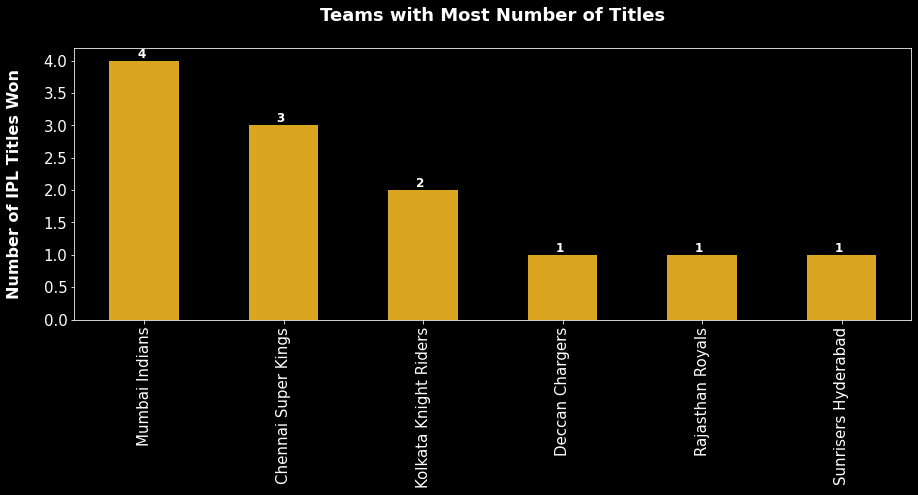

In [1782]:
season_winner = season_winner['Season_Winner'].value_counts().plot(kind = 'bar', figsize=(15,5), color='goldenrod', fontsize=15)
plt.style.use('dark_background')

season_winner.set_title('Teams with Most Number of Titles\n', fontsize=18, fontweight ='bold')

season_winner.set_ylabel('Number of IPL Titles Won\n', fontsize=16, fontweight= 'bold')

for i in season_winner.patches:
    # fixing the width of the mark labels (get height pushes the mark label up or down & get_x puuls left or right)
    
    season_winner.text(i.get_x()+.20, i.get_height()+.05, i.get_height(), fontsize =12,fontweight='bold', color='white')

#### Mumbai Indians is by far the most successful IPL team with 4 IPL title followed by Chennai Super Kings (3 IPL Titles) and Kolkata Rider(2 IPL titles). There are also the top 3 teams who won maximum nuber of matches in IPL.

In [1783]:
most_toss_win = matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

#### we can notice here that rising pune supergiant appeared twice due to spelling mistake let's fix this

In [1784]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants', inplace=True)

In [1785]:
most_toss_win = matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

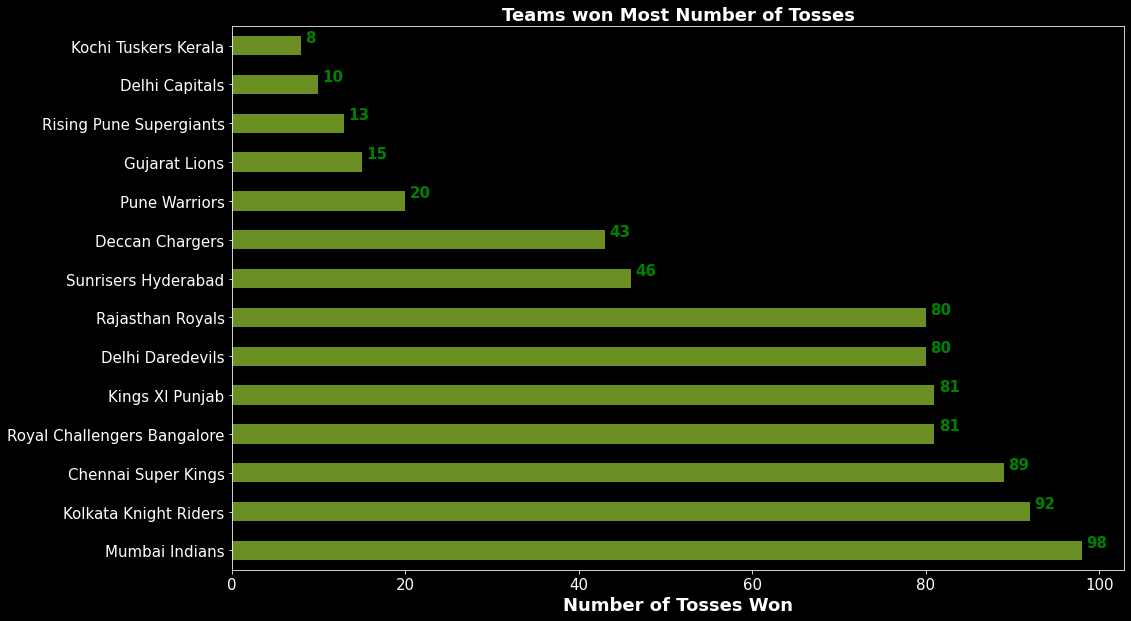

In [1786]:
most_toss_win = most_toss_win.plot.barh(figsize=(16,10), color='olivedrab', fontsize=15)
plt.style.use('dark_background')

most_toss_win.set_title('Teams won Most Number of Tosses', fontsize=18, fontweight='bold')

most_toss_win.set_xlabel('Number of Tosses Won', fontsize=18, fontweight='bold')

for i in most_toss_win.patches:
    #fixing the width of the marks labels (get width pulls the mark label left or right & get_y pushes up or down)
    most_toss_win.text(i.get_width()+0.5,i.get_y()+.35, i.get_width(), fontsize=15, fontweight ='bold', color='green')

#### we can infer this the winning the toss impacts on match winner as top 3 most successful teams(Mumbai Indian,Kolkata Knight Riders & Chennai Super Kings) of ipl also won most number of tosses

In [1787]:
# toss decision by teams

toss_decision = matches['toss_decision'].value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

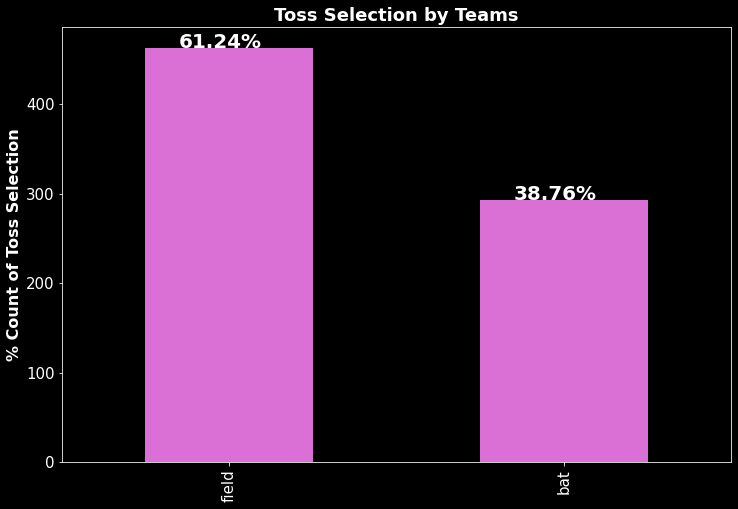

In [1788]:
toss_decision = toss_decision.plot(kind = 'bar',figsize=(12,8), color='orchid', fontsize=15)
plt.style.use('dark_background')

toss_decision.set_title('Toss Selection by Teams', fontsize=18,fontweight ='bold')
toss_decision.set_ylabel('% Count of Toss Selection', fontsize=16, fontweight ='bold')

totals = []

#find the values and append to list
for i in toss_decision.patches:
    totals.append(i.get_height())

#set individual bar labeels using above list
total = sum(totals)

for i in toss_decision.patches:
    #fixing the width of the mark labels (get_height pushes the mark label up or down & get_x pulls left or right)
    toss_decision.text(i.get_x()+.10, i.get_height()+.01, str(round((i.get_height()/total)*100,2))+'%', fontsize=20, fontweight='bold', color='white')

#### from this analysis we can inter that most of the teams preferred to field first when thet won the toss.

In [1789]:
# teams winning by battling first-second
#batting first
most_wins_batting_first = matches.winner[matches.win_by_runs!=0].value_counts()

In [1790]:
most_wins_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

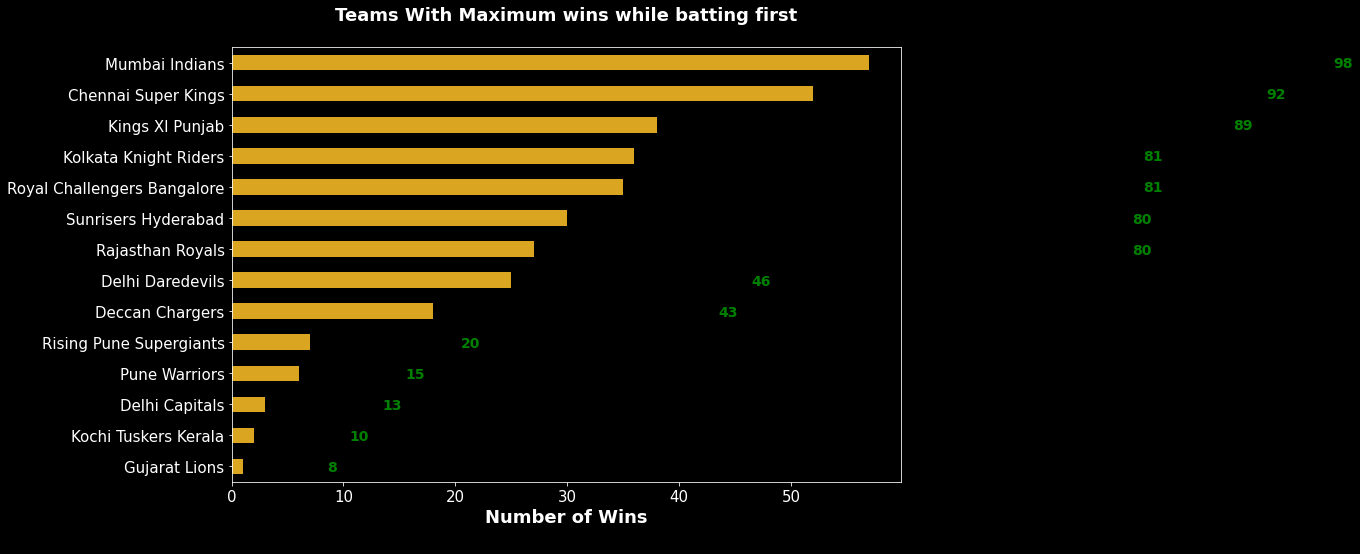

In [1791]:
most_wins_batting_first = most_wins_batting_first.plot(kind='barh', figsize=(12,8), color='goldenrod', fontsize=15)
plt.style.use('dark_background')

most_wins_batting_first.set_title('Teams With Maximum wins while batting first\n', fontsize=18, fontweight='bold')

most_wins_batting_first.set_xlabel('Number of Wins\n', fontsize=18, fontweight='bold')

most_wins_batting_first.invert_yaxis()

for i in most_toss_win.patches:
    #fixing the width of the marks labels (get width pulls the mark label left or right & get_y pushes up or down)
    most_wins_batting_first.text(i.get_width()+0.5,i.get_y()+.40, i.get_width(), fontsize=14, fontweight ='bold', color='green')

#### We can see that Mumbai Indians registered most wins while battling first as compared to other teams. So, from this analyisis we can also say that Mumbai Indians is the best team while defending the score

In [1792]:
# batting second
most_wins_batting_second = matches.winner[matches.win_by_wickets!=0].value_counts()
most_wins_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

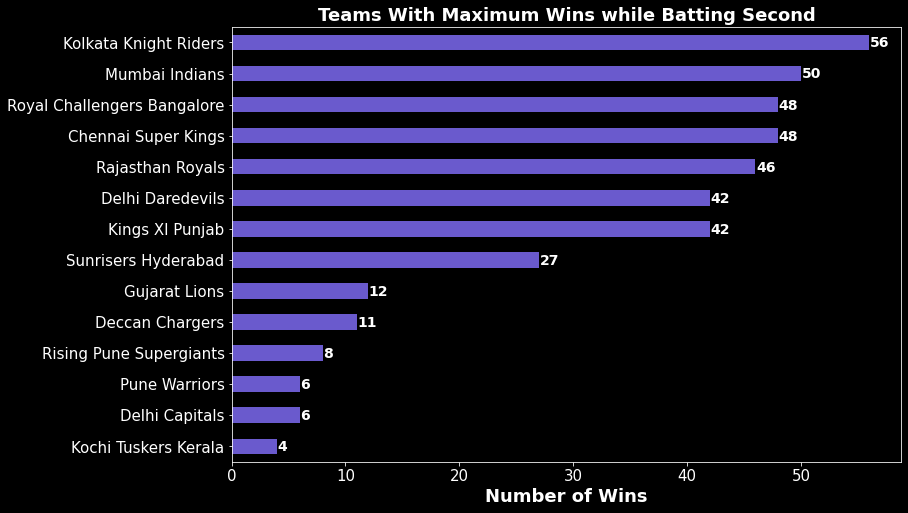

In [1793]:
most_wins_batting_second = most_wins_batting_second.plot(kind ='barh', figsize=(12,8), color='slateblue', fontsize=15)
plt.style.use('dark_background')

most_wins_batting_second.set_title('Teams With Maximum Wins while Batting Second', fontsize=18, fontweight='bold')

most_wins_batting_second.set_xlabel('Number of Wins', fontsize=18, fontweight='bold')
most_wins_batting_second.invert_yaxis()


for i in most_wins_batting_second.patches:
    #fixing the width of the mark labels (get width pulls the mark label left or right & get_y pushes up or down)
    most_wins_batting_second.text(i.get_width()+.05, i.get_y()+.40, i.get_width(), fontsize=14, 
                                  fontweight= 'bold', color='white')

#### We can see that Kolkata Knight Riders register most wins while batting second as compared to other teams. So, from this analysis we can also say that Kolkata Knight Riders is the best team when chasing the target

## Key Insights:

- Total 14 Teams Participated in IPL over 11 Years(2008-2009) out of which only 6 teams managed to win the IPL title.

- Mumbai Indians is the most successful team in the IPL history(with most number of the IPL title(4) and most number of match wins(109) followed by Chennai Super Kings (with 3 IPL title and most wins in IPL (100) and Kolkata Rider(with 2 IPL titles and third most number of wins(92).

- Frome the toss analysis we can infer that the top 3 most successful teams also won maximum number of tosses and the teams who won the toss preferred to field first 61.2% times.

- Mumbai Indians the most successful team while defending the target, and
- Kolkata Knight Riders is the most successful team while chasing the target